# Student Information

###Author: Suhaib Atef

###Student ID: 132823

###Section: 1

###Class: Special Topics CPE597 (10:30-11:30)

###Assignment Title: Polynomial Regression 


# Introduction



## Tasks given by the Assignment

1.   Find an Online Dataset with multiple features which is suitable for polynomial regression

> *   Upload this dataset to your Google Drive account.
* Add a description of the dataset.
* Add the source of the dataset and the link to it.

*Note: you may need split your dataset into train, validation, and test sets to be able to solve the assignment*

2.   Apply linear regression to your dataset from the **sklearn library**

> *   Prove that the features are not enough to model the problem and there is a need to create polynomial features.
*   Report the performance metrics.

3.   Train 4 polynomial regression models:

>>>>1.   1st - Normal Polynomial Regression Model with Feature Scaling
2.   2nd - Polynomial Regression Model with Feature Scaling & High Variance
3.   3rd - Normal Polynomial Regression Model without Feature Scaling
4.   4th - Polynomial Regression Model without Feature Scaling but with High Variance

4. Compare Results

5. Discussion 


## Variables in My Code (Editable)

In [1]:
datasetName= "boston"
xFeatureName= "LSTAT"
yTargetName= "MV"
testPrecentage = 0.2

## Code Requirements

### Required Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter("ignore", UserWarning)
%matplotlib inline

### Defined Function to train models using pipelines

In [3]:
def showModel(pipe,p=True):
  pipe.fit(X_train, y_train)
  y_pred_test_pipe = pipe.predict(X_test)
  a = pipe.named_steps['linearRegression'].coef_
  b = pipe.named_steps['linearRegression'].intercept_
  mean = mean_squared_error(y_test, y_pred_test_pipe)
  r2 = r2_score(y_test, y_pred_test_pipe)
  
  linear_data_Y = pipe.predict(linear_data_X1.reshape(-1, 1))
  
  return mean,r2,linear_data_Y

# 1.   Find an Online Dataset with multiple features which is suitable for polynomial regression



The dataset is from "http://lib.stat.cmu.edu/datasets/boston".

In our assignment we will be using LSTAT data to predict the MV.
* LSTAT - % lower status of the population
* MV  - Median value of owner-occupied homes in $1000's


## Downloading the data

In [4]:
!gdown 17doFg_9HC2lic-s6UjD0TddjrGcYqXc_

Downloading...
From: https://drive.google.com/uc?id=17doFg_9HC2lic-s6UjD0TddjrGcYqXc_
To: /content/boston.csv
100% 63.0k/63.0k [00:00<00:00, 56.9MB/s]


## View 5 Rows of the Data

In [5]:
df = pd.read_csv(datasetName+'.csv')
X=df[[xFeatureName]]
y=df[[yTargetName]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testPrecentage, random_state=1)
# Check the data 
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


## Ploting the Data

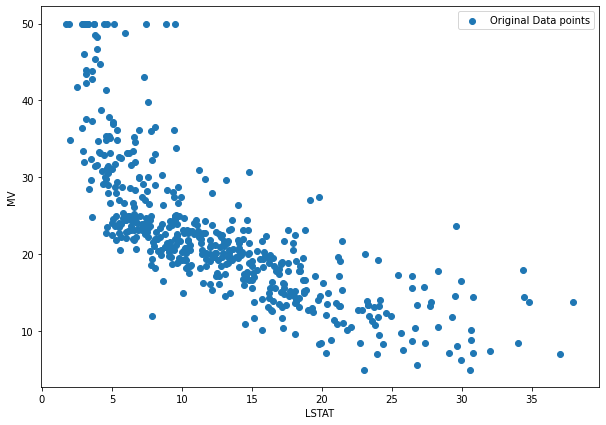

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(df[xFeatureName],df[yTargetName], label="Original Data points")
plt.xlabel(xFeatureName)
plt.ylabel(yTargetName)
linear_data_X1 = np.linspace(df[xFeatureName].min(), df[xFeatureName].max(), 100)
plt.legend();

# 2.   Apply linear regression to your dataset from the **sklearn library**

In [7]:
pipe0 = Pipeline(steps=[
    ('linearRegression', LinearRegression())
])

linearMean,linearR2,linearYData = showModel(pipe0)
print("Mean squared error: %.2f" % linearMean)
print("R2 score: %.2f" % linearR2)


Mean squared error: 46.99
R2 score: 0.52


# 3.   Train 4 polynomial regression models:

## 1st - Normal Polynomial Regression Model with Feature Scaling

In [8]:
pipe1 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures(degree=3)),
    ('linearRegression', LinearRegression())
])

poly1Mean,poly1R2,poly1YData =showModel(pipe1)




## 2nd - Polynomial Regression Model with Feature Scaling & High Variance

In [9]:
pipe2 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures(degree=15)),
    ('linearRegression', LinearRegression())
])

poly2Mean,poly2R2,poly2YData =showModel(pipe2)

##  3rd - Normal Polynomial Regression Model without Feature Scaling

In [10]:
pipe3 = Pipeline(steps=[
    ('preprocessor', PolynomialFeatures(degree=3)),
    ('linearRegression', LinearRegression())
])
poly3Mean,poly3R2,poly3YData =showModel(pipe3)

## 4th - Polynomial Regression Model without Feature Scaling & High Variance

In [11]:
pipe4 = Pipeline(steps=[
    ('preprocessor', PolynomialFeatures(degree=15)),
    ('linearRegression', LinearRegression())
])

poly4Mean,poly4R2,poly4YData =showModel(pipe4)

#4. Compare Results

## Part 1 

### Linear Regression Plot

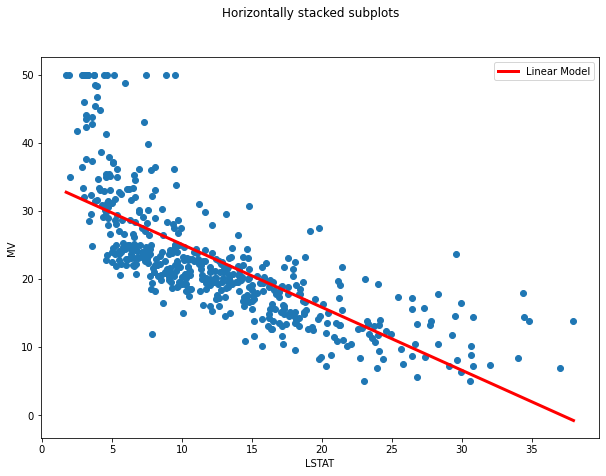

In [12]:
fig, ax1 = plt.subplots(figsize=(10,7))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(linear_data_X1, linearYData,color='red', lw=3, label="Linear Model")
ax1.scatter(X, y)
ax1.set_xlabel(xFeatureName)
ax1.set_ylabel(yTargetName)
ax1.legend();


### Data Metrics 

In [13]:
data = [["Linear Regression",linearMean,linearR2]]
metrics = pd.DataFrame(data, columns=['Model', 'Mean','R2'])
metrics 


,Model,Mean,R2
0,Linear Regression,46.99482,0.524476


## Part 2 

### 1st Model Regression Plot

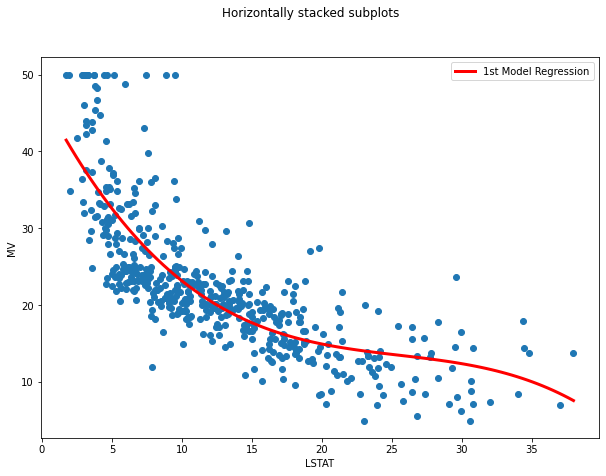

In [14]:
fig, ax1 = plt.subplots(figsize=(10,7))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(linear_data_X1, poly1YData,color='red', lw=3, label="1st Model Regression")
ax1.scatter(X, y)
ax1.set_xlabel(xFeatureName)
ax1.set_ylabel(yTargetName)
ax1.legend();

### 2nd Model Regression Plot

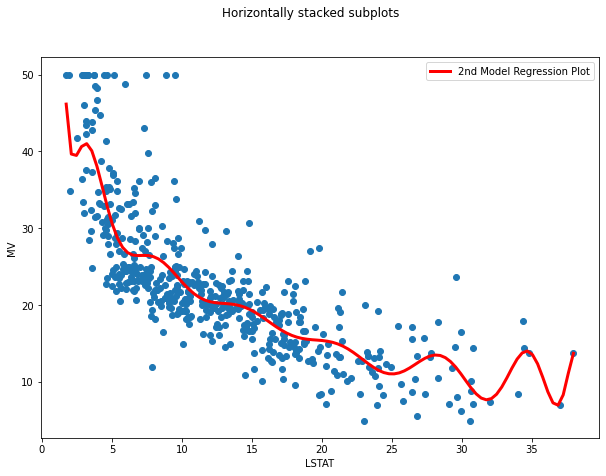

In [15]:
fig, ax1 = plt.subplots(figsize=(10,7))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(linear_data_X1, poly2YData,color='red', lw=3, label="2nd Model Regression Plot")
ax1.scatter(X, y)
ax1.set_xlabel(xFeatureName)
ax1.set_ylabel(yTargetName)
ax1.legend();

### 1st + 2nd + Linear Plots

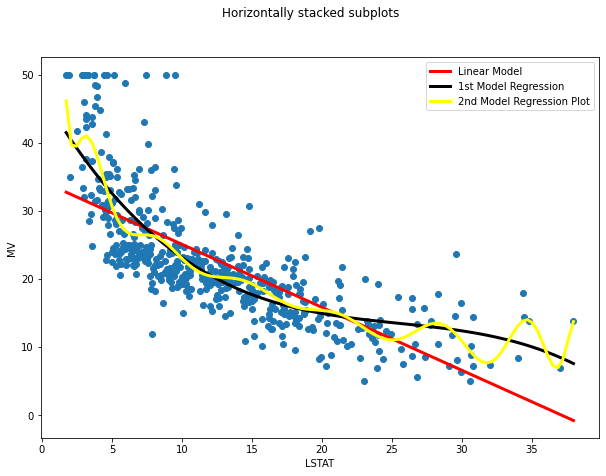

In [16]:
fig, ax1 = plt.subplots(figsize=(10,7))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(linear_data_X1, linearYData,color='red', lw=3, label="Linear Model")
ax1.plot(linear_data_X1, poly1YData,color='Black', lw=3, label="1st Model Regression")
ax1.plot(linear_data_X1, poly2YData,color='Yellow', lw=3, label="2nd Model Regression Plot")
ax1.scatter(X, y)
ax1.set_xlabel(xFeatureName)
ax1.set_ylabel(yTargetName)
ax1.legend();

### Data Metrics 

In [17]:
metrics.loc[len(metrics.index)] = ['1st PolyReg with Feature Scale', poly1Mean, poly1R2] 
metrics.loc[len(metrics.index)] = ['2nd PolyReg with Feature Scale&High Variance', poly2Mean, poly2R2] 
metrics

,Model,Mean,R2
0,Linear Regression,46.994820,0.524476
1,1st PolyReg with Feature Scale,32.643405,0.669693
2,2nd PolyReg with Feature Scale&High Variance,29.151918,0.705022


## Part 3 

### 3rd Model Regression Plot

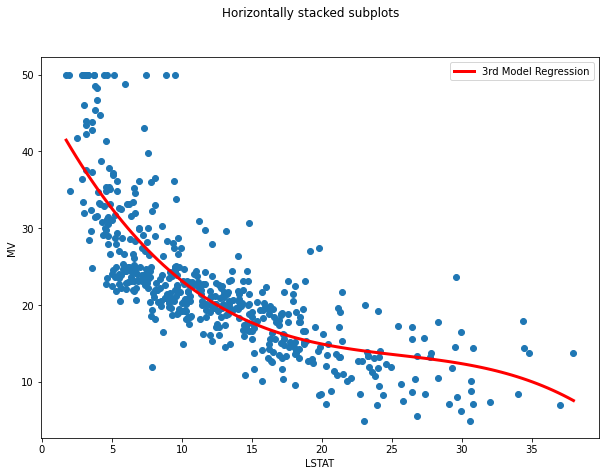

In [18]:
fig, ax1 = plt.subplots(figsize=(10,7))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(linear_data_X1, poly3YData,color='red', lw=3, label="3rd Model Regression")
ax1.scatter(X, y)
ax1.set_xlabel(xFeatureName)
ax1.set_ylabel(yTargetName)
ax1.legend();

### 4th Model Regression Plot

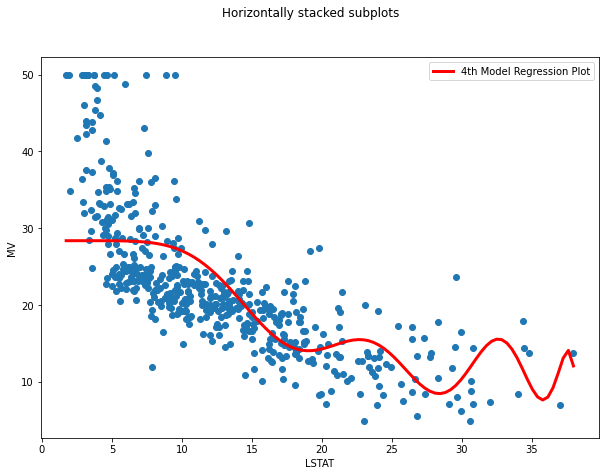

In [19]:
fig, ax1 = plt.subplots(figsize=(10,7))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(linear_data_X1, poly4YData,color='red', lw=3, label="4th Model Regression Plot")
ax1.scatter(X, y)
ax1.set_xlabel(xFeatureName)
ax1.set_ylabel(yTargetName)
ax1.legend();

### 3rd + 4th + Linear Plots

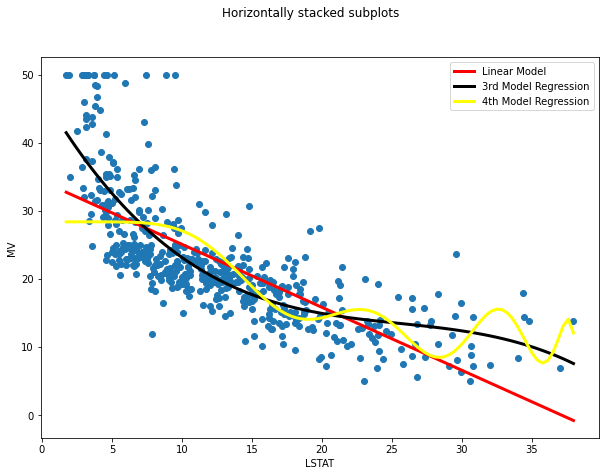

In [20]:
fig, ax1 = plt.subplots(figsize=(10,7))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(linear_data_X1, linearYData,color='red', lw=3, label="Linear Model")
ax1.plot(linear_data_X1, poly3YData,color='Black', lw=3, label="3rd Model Regression")
ax1.plot(linear_data_X1, poly4YData,color='Yellow', lw=3, label="4th Model Regression")
ax1.scatter(X, y)
ax1.set_xlabel(xFeatureName)
ax1.set_ylabel(yTargetName)
ax1.legend();

### Data Metrics 

In [21]:
metrics.loc[len(metrics.index)] = ['3rd PolyReg without Feature Scale', poly3Mean, poly3R2] 
metrics.loc[len(metrics.index)] = ['4th PolyReg without Feature Scale but with High Variance', poly4Mean, poly4R2] 
metrics

,Model,Mean,R2
0,Linear Regression,46.994820,0.524476
1,1st PolyReg with Feature Scale,32.643405,0.669693
2,2nd PolyReg with Feature Scale&High Variance,29.151918,0.705022
3,3rd PolyReg without Feature Scale,32.643405,0.669693
4,4th PolyReg without Feature Scale but with Hig...,56.584576,0.427440


# 5. Discussion 

,Model,Mean,R2
0,Linear Regression,46.994820,0.524476
1,1st PolyReg with Feature Scale,32.643405,0.669693
2,2nd PolyReg with Feature Scale&High Variance,29.151918,0.705022
3,3rd PolyReg without Feature Scale,32.643405,0.669693
4,4th PolyReg without Feature Scale but with Hig...,56.584576,0.427440


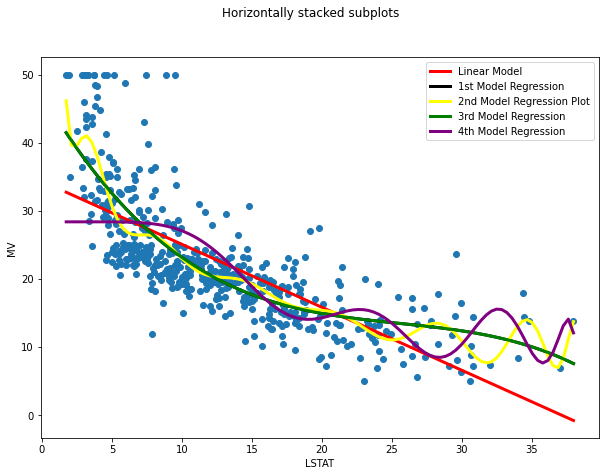

In [22]:
fig, ax1 = plt.subplots(figsize=(10,7))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(linear_data_X1, linearYData,color='red', lw=3, label="Linear Model")
ax1.plot(linear_data_X1, poly1YData,color='Black', lw=3, label="1st Model Regression")
ax1.plot(linear_data_X1, poly2YData,color='Yellow', lw=3, label="2nd Model Regression Plot")
ax1.plot(linear_data_X1, poly3YData,color='Green', lw=3, label="3rd Model Regression")
ax1.plot(linear_data_X1, poly4YData,color='Purple', lw=3, label="4th Model Regression")

ax1.scatter(X, y)
ax1.set_xlabel(xFeatureName)
ax1.set_ylabel(yTargetName)
ax1.legend();
metrics

## Results



*   Part1: It is shown that linear regression can not cover the whole dataset as we would want.
*   Part2: We see the result of High Variance that has a better curve but is 5 times the number of features.
*   Part3: We can see the effect of the Feature Scaling on the 4th Polynomial Regression Model.  



## Final Thoughts



*   sklearn is a powerfull library that allow us with few lines to generate a whole model. 
*   Choosing the model , the parameters and the performance metrics changes everything for the model.
* Finding and choosing a dataset is one of the hardest things to do. 

